## Construire un chatbot à l'aide de réseaux de neurones basés sur l'attention


Si vous avez déjà regardé des films de science-fiction futuristes, il y a de fortes chances que vous ayez vu un humain parler à un robot. L'intelligence basée sur la machine est une caractéristique de longue date des œuvres de fiction ; Cependant, grâce aux progrès récents de NLP et de l'apprentissage en profondeur, les conversations avec un ordinateur ne sont plus un fantasme. Bien que nous soyons peut-être à de nombreuses années de la véritable intelligence, où les ordinateurs sont capables de comprendre le sens du langage de la même manière que les humains, les machines sont au moins capables de tenir une conversation de base et de donner une impression rudimentaire d'intelligence.

Dans le guide précédent, nous avons vu comment construire des modèles séquence à séquence pour traduire des phrases d'une langue à une autre. Un chatbot conversationnel capable d'interactions de base fonctionne à peu près de la même manière. Lorsque nous parlons à un chatbot, notre phrase devient l'entrée du modèle. La sortie est celle avec laquelle le chatbot choisit de répondre. Par conséquent, plutôt que d'entraîner notre chatbot à apprendre à interpréter notre phrase d'entrée, nous lui apprenons à répondre.

Nous développerons nos modèles séquence à séquence du guides précédent, en ajoutant quelque chose qui attire l'attention sur nos modèles. Cette amélioration des modèles séquence à séquence signifie que notre modèle apprend où chercher dans la phrase d'entrée pour obtenir les informations dont il a besoin, plutôt que d'utiliser la décision de la phrase d'entrée entière. Cette amélioration nous permet de créer des modèles séquence à séquence beaucoup plus efficaces avec des performances de pointe.

 Dans ce guide, nous examinerons les sujets suivants :
 
 * La théorie de l'attention au sein des réseaux de neurones
 
 * Mettre en œuvre l'attention au sein d'un réseau de neurones pour construire un chatbot



## La théorie de l'attention au sein des réseaux de neurones

Dans le guide précédent, dans notre modèle séquence à séquence pour la traduction de phrases (sans implémentation d'attention), nous avons utilisé à la fois des encodeurs et des décodeurs. L'encodeur a obtenu un état caché de la phrase d'entrée, qui était une représentation de notre phrase. Le décodeur a ensuite utilisé cet état caché pour effectuer les étapes de traduction. Une illustration graphique de base de ceci est la suivante :

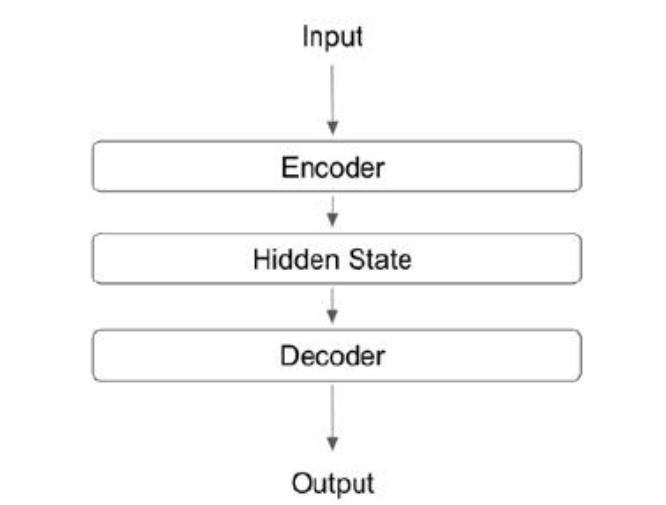


Cependant, le décodage sur l'intégralité de l'état caché n'est pas forcément le moyen le plus efficace d'utiliser cette tâche. Cela est dû au fait que l'état caché représente l'intégralité de la phrase d'entrée ; Cependant, dans certaines tâches (telles que la prédiction du mot suivant dans une phrase), nous n'avons pas besoin de considérer l'intégralité de la phrase d'entrée, mais uniquement les parties pertinentes pour la prédiction que nous essayons de faire. Nous pouvons montrer cela en utilisant l'attention au sein de notre réseau de neurones séquence à séquence. Nous pouvons apprendre à notre modèle à ne regarder que les parties pertinentes de l'entrée afin de faire sa prédiction, résultant en un modèle beaucoup plus efficace et précis.

Prenons l'exemple suivant : 

je me rendrai à Paris, la capitale de la France, le 2 mars. Mon vol part de l'aéroport de Londres Heathrow et prendra environ une heure.

 Disons que nous entraînons un modèle pour prédire le mot suivant dans une phrase. On peut d'abord saisir le début de la phrase : 
 
 la capitale de la France est ____

Nous nous attendrions à ce que notre modèle puisse récupérer le mot Paris, dans ce cas. Si nous devions utiliser notre modèle de base séquence à séquence, nous transformerions l'intégralité de notre entrée en un état caché, dont notre modèle essaierait ensuite d'extraire les informations pertinentes. Cela inclut toutes les informations superflues sur les vols. Vous remarquerez peut-être ici que nous n'avons besoin de regarder qu'une petite partie de notre phrase d'entrée afin d'identifier les informations pertinentes requises pour compléter notre phrase :

Je me rendrai à **Paris, la capitale de la France**, le 2 mars. Mon vol part de l'aéroport de Londres Heathrow et prendra environ une heure.


Par conséquent, si nous pouvons entraîner notre modèle à utiliser uniquement les informations pertinentes dans la phrase d'entrée, nous pouvons faire des prédictions plus précises et pertinentes. Nous pouvons mettre en œuvre l'attention au sein de nos réseaux afin d'y parvenir. Il existe deux principaux types de mécanismes d'attention que nous pouvons mettre en œuvre : 

l'attention **locale** et **globale**.

## Comparer l'attention locale et globale

Les deux formes d'attention que nous pouvons mettre en œuvre au sein de nos réseaux sont très similaires, mais avec des différences de clé subtiles. Nous commencerons par examiner l'attention locale.


En attention locale, notre modèle ne regarde que quelques états cachés de l'encodeur. Par exemple, si nous effectuons une tâche de traduction de phrase et que nous calculons le deuxième mot de notre traduction, le modèle peut souhaiter ne regarder que les états cachés de l'encodeur liés au deuxième mot de la phrase d'entrée. Cela signifierait que notre modèle doit examiner le deuxième état caché de notre encodeur (h2) mais peut-être aussi l'état caché avant lui (h1). Dans le schéma suivant, nous pouvons le voir en pratique :

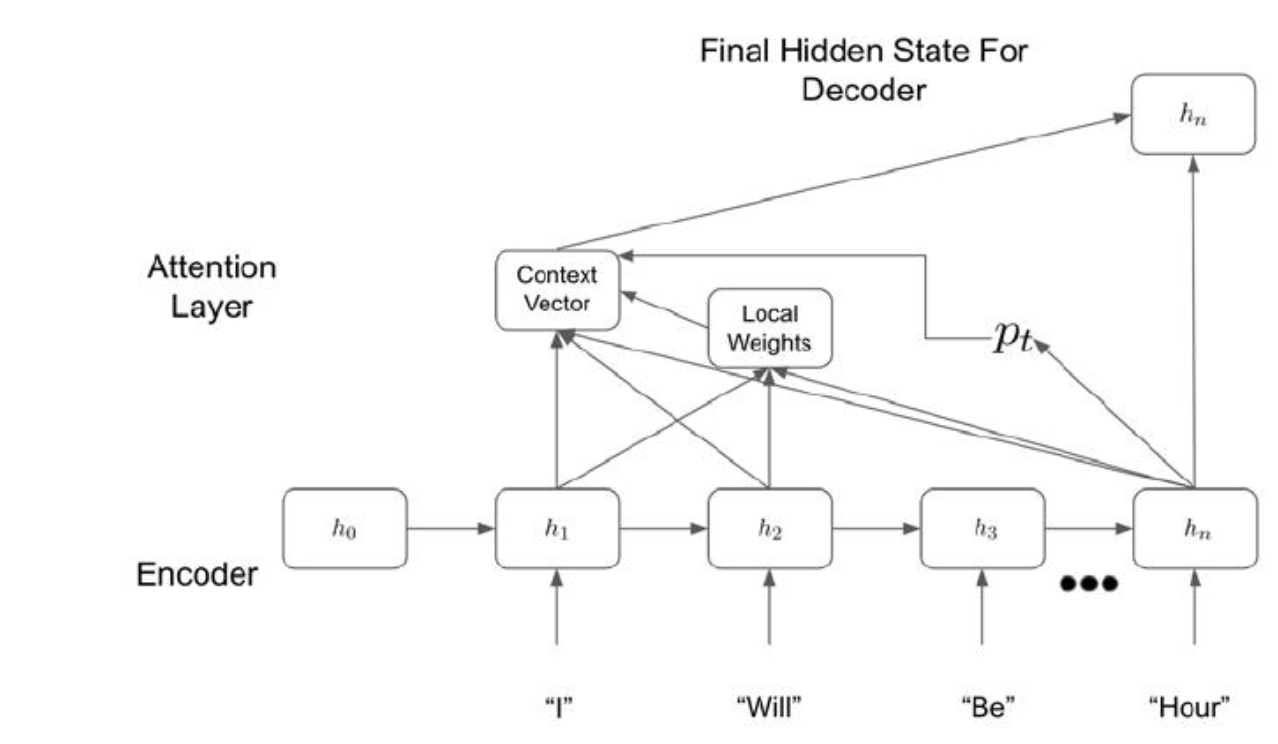



Nous commençons par calculer la position alignée, pt, à partir de notre état caché final, hn. Cela nous dit quels états cachés nous devons examiner pour faire notre prédiction. Nous calculons ensuite nos poids locaux et les appliquons à nos états cachés afin de déterminer notre vecteur de contexte. Ces poids peuvent nous dire de prêter plus d'attention à l'état caché le plus pertinent (h2) mais moins d'attention à l'état caché précédent (h1)

Nous prenons ensuite notre vecteur de contexte et le transmettons à notre décodeur afin de faire sa prédiction. Dans notre modèle séquence à séquence non basé sur l'attention, nous n'aurions fait passer que notre état caché final, hn, vers l'avant, mais nous voyons ici qu'au lieu de cela, nous ne considérons que les états cachés pertinents que notre modèle juge nécessaires pour rendre son prédiction

Le modèle d'attention globale fonctionne de manière très similaire. Cependant, au lieu de ne regarder que quelques-uns des états cachés, nous voulons regarder tous les états cachés de notre modèle, d'où le nom global. Nous pouvons voir une illustration graphique d'une couche d'attention globale ici

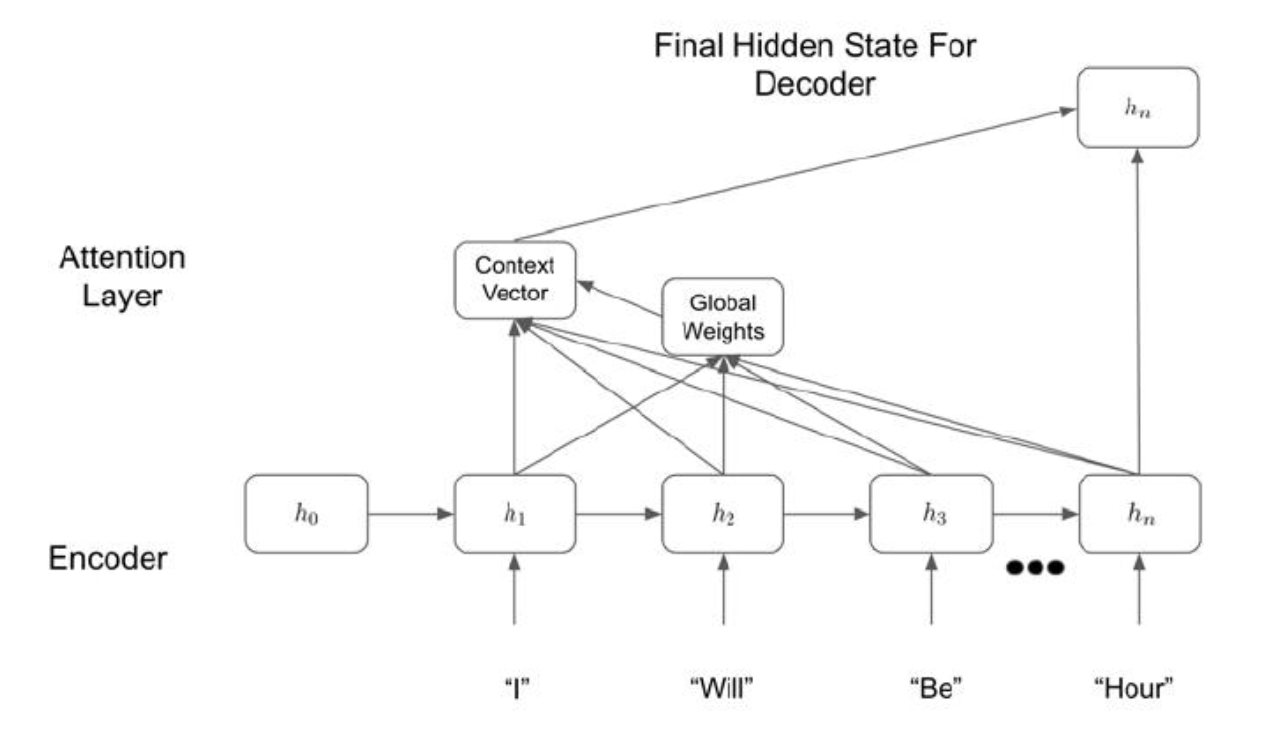

Nous pouvons voir dans le diagramme précédent que bien que cela semble très similaire à notre cadre d'attention locale, notre modèle examine maintenant tous les états cachés et calcule les poids globaux à travers chacun d'eux. Cela permet à notre modèle d'examiner n'importe quelle partie de la phrase d'entrée qu'il considère pertinente, au lieu de se limiter à une zone locale déterminée par la méthodologie de l'attention locale. Notre modèle peut souhaiter ne regarder qu'une petite zone locale, mais cela est dans les capacités du modèle. Une façon simple de penser au cadre de l'attention globale est qu'il apprend essentiellement un masque qui ne permet que des états cachés pertinents pour notre prédiction.

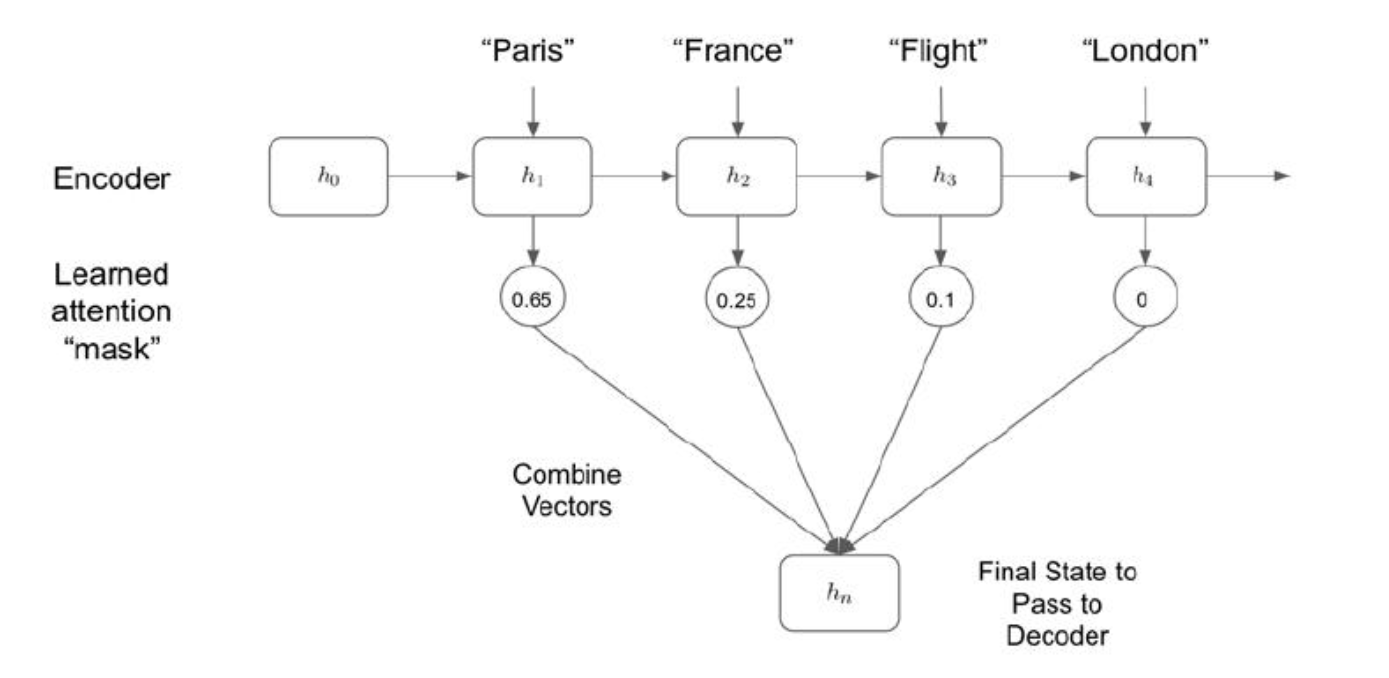

Nous pouvons voir dans le diagramme précédent qu'en apprenant à quels états cachés faire attention, notre modèle contrôle quels états sont utilisés dans l'étape de décodage pour déterminer notre sortie prédite. Une fois que nous avons décidé des états cachés auxquels nous devons prêter attention, nous pouvons les combiner en utilisant un certain nombre de méthodes différentes, soit en concaténant, soit en prenant le produit scalaire pondéré.

## Construire un chatbot en utilisant des réseaux de neurones séquence à séquence avec attention

Le moyen le plus simple d'illustrer exactement comment mettre en œuvre l'attention au sein de notre réseau de neurones est de travailler sur un exemple. Nous allons maintenant passer en revue les étapes nécessaires pour créer un chatbot à partir de zéro en utilisant un modèle de séquence à séquence avec un cadre d'attention appliqué. Comme pour tous nos autres modèles de NLP, notre première étape consiste à obtenir et à traiter un ensemble de données à utiliser. pour entraîner notre modèle.


## Acquérir notre jeu de données

Pour entraîner notre chatbot, nous avons besoin d'un ensemble de données de conversations grâce auquel notre modèle peut apprendre à répondre. Notre chatbot prendra une ligne de saisie humaine et y répondra avec une phrase générée. 

Par conséquent, un ensemble de données idéal consisterait en un certain nombre de lignes de dialogue avec des réponses appropriées. L'ensemble de données parfait pour une tâche comme celle-ci serait de véritables journaux de discussion provenant de conversations entre deux utilisateurs humains.


Malheureusement, ces données sont des informations privées et sont très difficiles à trouver dans le domaine public, donc pour cette tâche, nous utiliserons un ensemble de données de scripts de films. Les scripts de films consistent en des conversations entre deux ou plusieurs personnages. Bien que ces données ne soient pas naturellement dans le format dans lequel nous voudrions qu'elles soient, nous pouvons facilement les transformer dans le format dont nous avons besoin. Prenons, par exemple, une simple conversation entre deux personnages :


* Line 1: Hello Bethan.
* Line 2: Hello Tom, how are you?
* Line 3: I'm great thanks, what are you doing this evening?
* Line 4: I haven't got anything planned.
* Line 5: Would you like to come to dinner with me?

Maintenant, nous devons transformer cela en paires d'entrée et de sortie d'appel et de réponse, où l'entrée est une ligne dans le script (l'appel) et la sortie attendue est la ligne suivante du script (la réponse). On peut transformer un script de n lignes en n-1 paires d'entrées/sorties :

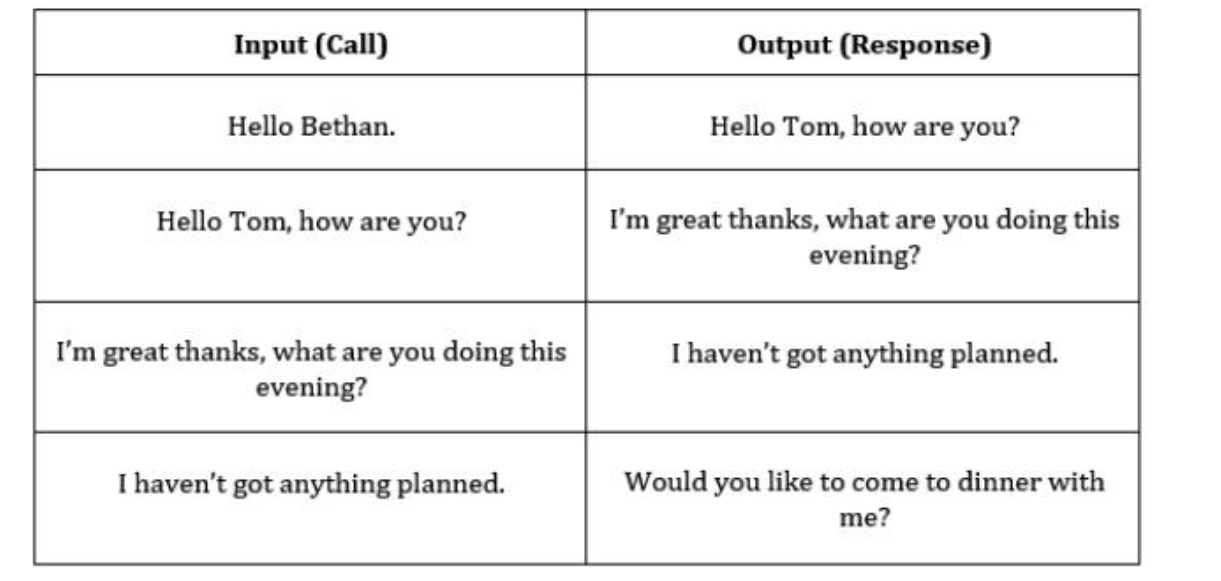

Nous pouvons utiliser ces paires entrée/sortie pour entraîner notre réseau, où l'entrée est un proxy pour l'entrée humaine et la sortie est la réponse que nous attendrions de notre modèle. La première étape de la construction de notre modèle consiste à lire ces données et à effectuer toutes les étapes de prétraitement nécessaires

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import torch
from torch.jit import script, trace
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import csv
import random
import re
import os
import unicodedata
import codecs
from io import open
import itertools
import math


USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")

## Processing de notre jeu de données

L'étape suivante consiste à reformater notre fichier de données et à charger les données dans des structures avec lesquelles nous pouvons travailler.

Le Cornell Movie-Dialogs Corpus est un riche ensemble de données de dialogues de personnages de films :

* 220 579 échanges conversationnels entre 10 292 paires de personnages de films
* 9 035 personnages de 617 films
* 304 713 énoncés au total


Cet ensemble de données est vaste et diversifié, et il existe une grande variation de formalité linguistique, de périodes, de sentiments, etc. Notre espoir est que cette diversité rende notre modèle robuste à de nombreuses formes d'entrées et de requêtes.

Tout d'abord, nous allons jeter un œil à quelques lignes de notre fichier de données pour voir le format d'origine.

In [ ]:
!wget http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip

--2021-10-20 11:26:10--  http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9916637 (9.5M) [application/zip]
Saving to: ‘cornell_movie_dialogs_corpus.zip’

cornell_movie_dialo 100%[===================>]   9.46M  5.03MB/s    in 1.9s    

2021-10-20 11:26:13 (5.03 MB/s) - ‘cornell_movie_dialogs_corpus.zip’ saved [9916637/9916637]



In [ ]:
! unzip cornell_movie_dialogs_corpus.zip

Archive:  cornell_movie_dialogs_corpus.zip
   creating: cornell movie-dialogs corpus/
  inflating: cornell movie-dialogs corpus/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/cornell movie-dialogs corpus/
  inflating: __MACOSX/cornell movie-dialogs corpus/._.DS_Store  
  inflating: cornell movie-dialogs corpus/chameleons.pdf  
  inflating: __MACOSX/cornell movie-dialogs corpus/._chameleons.pdf  
  inflating: cornell movie-dialogs corpus/movie_characters_metadata.txt  
  inflating: cornell movie-dialogs corpus/movie_conversations.txt  
  inflating: cornell movie-dialogs corpus/movie_lines.txt  
  inflating: cornell movie-dialogs corpus/movie_titles_metadata.txt  
  inflating: cornell movie-dialogs corpus/raw_script_urls.txt  
  inflating: cornell movie-dialogs corpus/README.txt  
  inflating: __MACOSX/cornell movie-dialogs corpus/._README.txt  


In [ ]:
corpus_name = "cornell movie-dialogs corpus"


def printLines(file, n=10):
    with open(file, 'rb') as datafile:
        lines = datafile.readlines()
    for line in lines[:n]:
        print(line)

printLines(os.path.join(corpus_name, "movie_lines.txt"))

b'L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!\n'
b'L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!\n'
b'L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.\n'
b'L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?\n'
b"L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.\n"
b'L924 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ Wow\n'
b"L872 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Okay -- you're gonna need to learn how to lie.\n"
b'L871 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ No\n'
b'L870 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?\n'
b'L869 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Like my fear of wearing pastels?\n'


## Créer un fichier de données formaté

Pour plus de commodité, nous allons créer un fichier de données bien formaté dans lequel chaque ligne contient une phrase de requête séparée par des tabulations et une paire de phrases de réponse.

Les fonctions suivantes facilitent l'analyse du fichier de données brut movie_lines.txt.

* loadLines divise chaque ligne du fichier en un dictionnaire de champs (lineID, characterID, movieID, character, text)
* loadConversations regroupe les champs de lignes de loadLines en conversations basées sur movie_conversations.txt
* extractSentencePairs extrait des paires de phrases des conversations

In [ ]:
# Splits each line of the file into a dictionary of fields
def loadLines(fileName, fields):
    lines = {}
    with open(fileName, 'r', encoding='iso-8859-1') as f:
        for line in f:
            values = line.split(" +++$+++ ")
            # Extract fields
            lineObj = {}
            for i, field in enumerate(fields):
                lineObj[field] = values[i]
            lines[lineObj['lineID']] = lineObj
    return lines


# Groups fields of lines from `loadLines` into conversations based on *movie_conversations.txt*
def loadConversations(fileName, lines, fields):
    conversations = []
    with open(fileName, 'r', encoding='iso-8859-1') as f:
        for line in f:
            values = line.split(" +++$+++ ")
            # Extract fields
            convObj = {}
            for i, field in enumerate(fields):
                convObj[field] = values[i]
            # Convert string to list (convObj["utteranceIDs"] == "['L598485', 'L598486', ...]")
            utterance_id_pattern = re.compile('L[0-9]+')
            lineIds = utterance_id_pattern.findall(convObj["utteranceIDs"])
            # Reassemble lines
            convObj["lines"] = []
            for lineId in lineIds:
                convObj["lines"].append(lines[lineId])
            conversations.append(convObj)
    return conversations


# Extracts pairs of sentences from conversations
def extractSentencePairs(conversations):
    qa_pairs = []
    for conversation in conversations:
        # Iterate over all the lines of the conversation
        for i in range(len(conversation["lines"]) - 1):  # We ignore the last line (no answer for it)
            inputLine = conversation["lines"][i]["text"].strip()
            targetLine = conversation["lines"][i+1]["text"].strip()
            # Filter wrong samples (if one of the lists is empty)
            if inputLine and targetLine:
                qa_pairs.append([inputLine, targetLine])
    return qa_pairs

Nous allons maintenant appeler ces fonctions et créer le fichier. Nous l'appellerons formated_movie_lines.txt

In [ ]:
# Define path to new file
datafile = os.path.join(corpus_name, "formatted_movie_lines.txt")

delimiter = '\t'
# Unescape the delimiter
delimiter = str(codecs.decode(delimiter, "unicode_escape"))

# Initialize lines dict, conversations list, and field ids
lines = {}
conversations = []
MOVIE_LINES_FIELDS = ["lineID", "characterID", "movieID", "character", "text"]
MOVIE_CONVERSATIONS_FIELDS = ["character1ID", "character2ID", "movieID", "utteranceIDs"]

# Load lines and process conversations
print("\nProcessing corpus...")
lines = loadLines(os.path.join(corpus_name, "movie_lines.txt"), MOVIE_LINES_FIELDS)
print("\nLoading conversations...")
conversations = loadConversations(os.path.join(corpus_name, "movie_conversations.txt"),
                                  lines, MOVIE_CONVERSATIONS_FIELDS)

# Write new csv file
print("\nWriting newly formatted file...")
with open(datafile, 'w', encoding='utf-8') as outputfile:
    writer = csv.writer(outputfile, delimiter=delimiter, lineterminator='\n')
    for pair in extractSentencePairs(conversations):
        writer.writerow(pair)

# Print a sample of lines
print("\nSample lines from file:")
printLines(datafile)


Processing corpus...

Loading conversations...

Writing newly formatted file...

Sample lines from file:
b"Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.\tWell, I thought we'd start with pronunciation, if that's okay with you.\n"
b"Well, I thought we'd start with pronunciation, if that's okay with you.\tNot the hacking and gagging and spitting part.  Please.\n"
b"Not the hacking and gagging and spitting part.  Please.\tOkay... then how 'bout we try out some French cuisine.  Saturday?  Night?\n"
b"You're asking me out.  That's so cute. What's your name again?\tForget it.\n"
b"No, no, it's my fault -- we didn't have a proper introduction ---\tCameron.\n"
b"Cameron.\tThe thing is, Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does.\n"
b"The thing is, Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't dat

Vous remarquerez d'abord que nos lignes sont comme prévu, car la seconde moitié de la première ligne devient la première moitié de la ligne suivante. On peut également noter que les moitiés d'appel et de réponse de chaque ligne sont séparées par un délimiteur de tabulation (/t) et que chacune de nos lignes est séparée par un nouveau délimiteur de ligne (/n). Nous devrons en tenir compte lorsque nous traiterons notre ensemble de données. La première étape consiste à créer un vocabulaire ou un corpus qui contient tous les mots uniques de notre ensemble de données

## Création du vocabulaire

Dans le passé, notre corpus comprenait plusieurs dictionnaires composés des mots uniques de notre corpus et des recherches entre les mots et les indices. Cependant, nous pouvons le faire d'une manière beaucoup plus élégante en créant une classe "vocabulary qui se compose de tous les éléments requis:

* 1. Nous commençons par créer notre classe de vocabulaire. Nous initialisons cette classe avec des dictionnaires vides — word2index et word2count. Nous initialisons également le dictionnaire index2word avec des espaces réservés pour nos jetons de remplissage, ainsi que nos jetons de début de phrase (SOS) et de fin de phrase (EOS). Nous comptons également le nombre de mots de notre vocabulaire (qui est de 3 pour commencer car notre corpus contient déjà les trois tokens mentionnés). Ce sont les valeurs par défaut pour un vocabulaire vide ; cependant, ils seront remplis au fur et à mesure que nous lisons nos données dans

* 2. Ensuite, nous créons les fonctions que nous utiliserons pour remplir notre vocabulaire. addWord prend un mot en entrée. S'il s'agit d'un nouveau mot qui n'est pas déjà dans notre vocabulaire, nous ajoutons ce mot à nos indices, mettons le compte de ce mot à 1, et incrémentons le nombre total de mots de notre vocabulaire de 1. Si le mot en question est déjà dans notre vocabulaire, on incrémente simplement le compte de ce mot de 1

* 3. Nous utilisons également la fonction addSentence pour appliquer la fonction addWord à tous les mots d'une phrase donnée

Une chose que nous pouvons faire pour accélérer l'apprentissage de notre modèle est de réduire la taille de notre vocabulaire. Cela signifie que toutes les couches d'intégration seront beaucoup plus petites et que le nombre total de paramètres appris dans notre modèle peut être inférieur. Un moyen simple de le faire est de supprimer tous les mots peu fréquents de notre vocabulaire. Il est peu probable que tous les mots apparaissant une ou deux fois dans notre ensemble de données aient un pouvoir prédictif énorme. Par conséquent, les supprimer de notre corpus et les remplacer par des jetons vides dans notre modèle final pourrait réduire le temps nécessaire à notre modèle pour s'entraîner et réduire plus. sans avoir beaucoup d'impact négatif sur les prédictions de notre modèle.

4. Pour supprimer les mots peu fréquents de notre vocabulaire, nous pouvons implémenter une fonction trim. La fonction parcourt d'abord le dictionnaire du nombre de mots et si l'occurrence du mot est supérieure au nombre minimum requis, il est ajouté à une nouvelle liste

5. Enfin, nos index sont reconstruits à partir de la nouvelle liste words_to_keep. Nous définissons tous les indices sur leurs valeurs vides initiales, puis les repeuplons en parcourant nos mots conservés avec la fonction addWord

Nous avons maintenant défini une classe de vocabulaire qui peut être facilement remplie avec nos phrases d'entrée. Ensuite, nous devons en fait charger notre ensemble de données pour créer nos données d'entraînement

In [ ]:
# Default word tokens
PAD_token = 0  # Used for padding short sentences
SOS_token = 1  # Start-of-sentence token
EOS_token = 2  # End-of-sentence token

class Voc:
    def __init__(self, name):
        self.name = name
        self.trimmed = False
        self.word2index = {}
        self.word2count = {}
        self.index2word = {PAD_token: "PAD", SOS_token: "SOS", EOS_token: "EOS"}
        self.num_words = 3  # Count SOS, EOS, PAD

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.num_words
            self.word2count[word] = 1
            self.index2word[self.num_words] = word
            self.num_words += 1
        else:
            self.word2count[word] += 1

    # Remove words below a certain count threshold
    def trim(self, min_count):
        if self.trimmed:
            return
        self.trimmed = True

        keep_words = []

        for k, v in self.word2count.items():
            if v >= min_count:
                keep_words.append(k)

        print('keep_words {} / {} = {:.4f}'.format(
            len(keep_words), len(self.word2index), len(keep_words) / len(self.word2index)
        ))

        # Reinitialize dictionaries
        self.word2index = {}
        self.word2count = {}
        self.index2word = {PAD_token: "PAD", SOS_token: "SOS", EOS_token: "EOS"}
        self.num_words = 3 # Count default tokens

        for word in keep_words:
            self.addWord(word)

## Chargement des données

Nous commencerons le chargement des données en procédant comme suit :

* 1. La première étape pour lire nos données consiste à effectuer toutes les étapes nécessaires pour nettoyer les données et les rendre plus lisibles. Nous commençons par le convertir d'Unicode au format ASCII. Nous pouvons facilement utiliser une fonction pour le faire

In [ ]:
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

* 2. Ensuite, nous voulons traiter nos chaînes d'entrée de manière à ce qu'elles soient toutes en minuscules et ne contiennent aucun espace ou ponctuation à la fin, à l'exception des caractères les plus élémentaires. Nous pouvons le faire en utilisant une série d'expressions régulières

In [ ]:
# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    s = re.sub(r"\s+", r" ", s).strip()
    return s

* 3. Enfin, nous appliquons cette fonction dans une fonction plus large, readVocs. Cette fonction lit notre fichier de données en lignes, puis applique la fonction cleanString à chaque ligne. Elle crée également une instance de la classe Vocabulary que nous avons créée précédemment, ce qui signifie que cette fonction génère à la fois nos données et notre vocabulaire 

In [ ]:
# Read query/response pairs and return a voc object
def readVocs(datafile, corpus_name):
    print("Reading lines...")
    # Read the file and split into lines
    lines = open(datafile, encoding='utf-8').\
        read().strip().split('\n')
    # Split every line into pairs and normalize
    pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]
    voc = Voc(corpus_name)
    return voc, pairs

Ensuite, nous filtrons nos paires d'entrées par leur longueur maximale. Ceci est encore fait pour réduire la dimensionnalité potentielle de notre modèle. Prédire des phrases de plusieurs centaines de mots nécessiterait une architecture très approfondie. Dans l'intérêt du temps d'entraînement, nous souhaitons limiter nos données d'entraînement ici aux cas où l'entrée et la sortie font moins de 10 mots.

* 4. Pour ce faire, nous créons quelques fonctions de filtre. Le premier, filterPair, renvoie une valeur booléenne selon que la ligne actuelle a une longueur d'entrée et de sortie inférieure à la longueur maximale. Notre deuxième fonction, filterPairs, applique simplement cette condition à toutes les paires de notre ensemble de données, en ne conservant que celles qui remplissent cette condition

In [ ]:
def filterPair(p, max_length):
    return len(p[0].split(' ')) < max_length and len(p[1].split(' ')) < max_length

def filterPairs(pairs, max_length):
    return [pair for pair in pairs if filterPair(pair, max_length)]

* 5. Maintenant, nous avons juste besoin de créer une fonction finale qui applique toutes les fonctions précédentes que nous avons rassemblées et de l'exécuter pour créer nos paires de vocabulaire et de données

In [ ]:
def loadData(corpus, corpus_name, datafile, max_length):
    voc, pairs = readVocs(datafile, corpus_name)
    print(str(len(pairs)) + " Sentence pairs")
    pairs = filterPairs(pairs, max_length)
    print(str(len(pairs))+ " Sentence pairs after trimming")
    for p in pairs:
        voc.addSentence(p[0])
        voc.addSentence(p[1])
    print(str(voc.num_words) + " Distinct words in vocabulary")
    return voc, pairs

In [ ]:

max_length = 10  
voc, pairs = loadData('', corpus_name, datafile, max_length)

Reading lines...
221282 Sentence pairs
64271 Sentence pairs after trimming
18008 Distinct words in vocabulary


Nous pouvons voir que notre ensemble de données d'entrée se compose de plus de 200 000 paires. Lorsque nous ﬁltrons cela sur des phrases dont l'entrée et la sortie font moins de 10 mots, cela se réduit à seulement 64 000 paires composées de 18 000 mots distincts.

* 6. Nous pouvons imprimer une sélection de nos paires entrées/sorties traitées afin de vérifier que nos fonctions ont toutes bien fonctionné :

In [ ]:
print("Example Pairs:")
for pair in pairs[-10:]:
    print(pair)

Example Pairs:
['four', 'three minutes to go !']
['three minutes to go !', 'yes .']
['another fifteen seconds to go .', 'do something ! stall them !']
['yes sir name please ?', 'food !']
['food !', 'do you have a reservation ?']
['do you have a reservation ?', 'food ! !']
['grrrhmmnnnjkjmmmnn !', 'franz ! help ! lunatic !']
['what o clock is it mr noggs ?', 'eleven o clock my lorj']
['stuart ?', 'yes .']
['yes .', 'how quickly can you move your artillery forward ?']


Il semble que nous ayons réussi à diviser notre ensemble de données en paires d'entrée et de sortie sur lesquelles nous pouvons entraîner notre réseau. Enfin, avant de commencer à construire le modèle, nous devons supprimer les mots rares de notre corpus et de nos paires de données.

## Supprimer les mots rares

Comme mentionné précédemment, y compris les mots qui n'apparaissent que quelques fois dans notre ensemble de données augmentera la dimensionnalité de notre modèle, augmentant la complexité de notre modèle et le temps qu'il faudra pour entraîner le modèle. Par conséquent, il est préférable de les supprimer de nos données d'entraînement pour garder notre modèle aussi rationalisé et eficace que possible.

Vous vous souvenez peut-être plus tôt que nous avons intégré une fonction trim dans notre vocabulary, ce qui nous permettra de supprimer de notre vocabulaire les mots peu fréquents. Nous pouvons maintenant créer une fonction pour supprimer ces mots rares et appeler la méthode trim de notre vocabulaire comme première étape. Vous verrez que cela supprime un grand pourcentage de mots de notre vocabulaire, indiquant que la majorité des mots de notre vocabulaire se produisent rarement. Cela est attendu car la distribution des mots dans n'importe quel modèle de langue suivra une distribution à longue traîne. Nous allons utiliser les étapes suivantes pour supprimer les mots.

* 1. Nous calculons d'abord le pourcentage de mots que nous conserverons dans notre modèle :

* 2. Dans cette même fonction, nous parcourons tous les mots des phrases d'entrée et de sortie. Si pour une paire donnée, la phrase d'entrée ou de sortie a un mot qui n'est pas dans notre nouveau corpus découpé, nous supprimons cette paire de notre ensemble de données. Nous imprimons la sortie et constatons que même si nous avons perdu plus de la moitié de notre vocabulaire, nous ne perdons qu'environ 17% de nos paires d'entraînement. Cela reflète à nouveau la façon dont notre corpus de mots est distribué sur nos paires d'entraînement individuelles

In [ ]:
def removeRareWords(voc, all_pairs, minimum):
    voc.trim(minimum)
    
    pairs_to_keep = []
    
    for p in all_pairs:
        keep = True
        
        for word in p[0].split(' '):
            if word not in voc.word2index:
                keep = False
                break
        for word in p[1].split(' '):
            if word not in voc.word2index:
                keep = False
                break

        if keep:
            pairs_to_keep.append(p)

    print("Trimmed from {} pairs to {}, {:.2%} of total".format(len(all_pairs)\
        , len(pairs_to_keep), len(pairs_to_keep)/ len(all_pairs)))
    return pairs_to_keep


minimum_count = 3
pairs = removeRareWords(voc, pairs, minimum_count)

keep_words 7823 / 18005 = 0.4345
Trimmed from 64271 pairs to 53165, 82.72% of total


Maintenant que nous avons notre jeu de données finalisé, nous devons construire des fonctions qui transforment notre jeu de données en lots de tenseurs que nous pouvons passer à notre modèle

## Transformer les paires de phrases en tenseurs

Nous savons que notre modèle ne prendra pas en entrée du texte brut, mais plutôt des représentations tensorielles de phrases. Nous ne traiterons pas non plus nos phrases une par une, mais plutôt par lots plus petits. Pour cela, nous avons besoin que nos phrases d'entrée et de sortie soient transformées en tenseurs, où la largeur du tenseur représente la taille du lot sur lequel nous souhaitons nous entraîner : 

* 1. Nous commençons par créer plusieurs fonctions d'assistance, que nous pouvons utiliser pour transformer nos paires en tenseurs. Nous créons d'abord une fonction indexFromSentence, qui récupère l'index de chaque mot de la phrase à partir du vocabulaire et ajoute un jeton EOS à la fin :

In [ ]:
def indexFromSentence(voc, sent):
    return [voc.word2index[w] for w in sent.split(' ')] + [EOS_token]

* 2. Deuxièmement, nous créons une fonction zeroPad, qui remplit tous les tenseurs avec des zéros de sorte que toutes les phrases du tenseur aient effectivement la même longueur.

In [ ]:
def zeroPad(l, fillvalue=PAD_token):
    return list(itertools.zip_longest(*l, fillvalue=fillvalue))

* 3. pour générer notre tenseur d'entrée, nous appliquons ces deux fonctions. Tout d'abord, nous obtenons les indices de notre phrase d'entrée, puis appliquons un remplissage, puis transformons la sortie en LongTensor. Nous obtiendrons également les longueurs de chacune de nos phrases d'entrée en sortie sous forme de tenseur :

In [ ]:
def inputVar(l, voc):
    indexes_batch = [indexFromSentence(voc, sentence) for sentence in l]
    padList = zeroPad(indexes_batch)
    padTensor = torch.LongTensor(padList)
    lengths = torch.tensor([len(indexes) for indexes in indexes_batch])
    return padTensor, lengths

* 4. Au sein de notre réseau, nos jetons pad doivent généralement être ignorés. Nous ne voulons pas entraîner notre modèle sur ces jetons pad, nous créons donc un mask booléen pour ignorer ces jetons. Pour ce faire, nous utilisons une fonction getMask, que nous appliquons à notre tenseur de sortie. lis renvoie simplement 1 si la sortie se compose d'un mot et 0 s'il s'agit d'un jeton de pad :

In [ ]:
def getMask(l, value=PAD_token):
    m = []
    for i, seq in enumerate(l):
        m.append([])
        for token in seq:
            if token == PAD_token:
                m[i].append(0)
            else:
                m[i].append(1)
    return m

* 5. Nous appliquons ensuite cela à notre fonction outputVar. il est identique à la fonction inputVar, sauf qu'avec le tenseur de sortie indexé et le tenseur des longueurs, nous renvoyons également le mask booléen de notre tenseur de sortie. Ce mask booléen renvoie juste True lorsqu'il y a un mot dans le tenseur de sortie et False lorsqu'il y a un jeton de pad. Nous retournons également la longueur maximale des phrases dans notre tenseur de sortie

In [ ]:
def outputVar(l, voc):
    indexes_batch = [indexFromSentence(voc, sentence) for sentence in l]
    max_target_len = max([len(indexes) for indexes in indexes_batch])
    padList = zeroPad(indexes_batch)
    mask = torch.BoolTensor(getMask(padList))
    padTensor = torch.LongTensor(padList)
    return padTensor, mask, max_target_len

* 6. Enfin, afin de créer simultanément nos lots d'entrée et de sortie, nous parcourons les paires de notre lot et créons des tenseurs d'entrée et de sortie pour les deux paires à l'aide des fonctions que nous avons créées précédemment. On retourne ensuite toutes les variables nécessaires

In [ ]:
def batch2Train(voc, batch):
    batch.sort(key=lambda x: len(x[0].split(" ")), reverse=True)
    
    input_batch = []
    output_batch = []
    
    for p in batch:
        input_batch.append(p[0])
        output_batch.append(p[1])
        
    inp, lengths = inputVar(input_batch, voc)
    output, mask, max_target_len = outputVar(output_batch, voc)
    
    return inp, lengths, output, mask, max_target_len

* 7. Cette fonction devrait être tout ce dont nous avons besoin pour transformer nos paires d'entraînement en tenseurs pour entraîner notre modèle. Nous pouvons valider que cela fonctionne correctement en effectuant une seule itération de notre fonction batch2Train sur une sélection aléatoire de nos données. Nous définissons notre taille de lot sur 5 et exécutons ceci une fois :

In [ ]:

test_batch_size = 5
batches = batch2Train(voc, [random.choice(pairs) for _ in range(test_batch_size)])
input_variable, lengths, target_variable, mask, max_target_len = batches

print("Input:")
print(input_variable)

print("Target:")
print(target_variable)

print("Mask:")
print(mask)

Input:
tensor([[  47,   50,   25,   75,   77],
        [   7,   37,  200, 2308,    6],
        [  74,  123,  467,    6,    2],
        [  25,  177,    4,    2,    0],
        [ 102,    6,    2,    0,    0],
        [7492,    2,    0,    0,    0],
        [   6,    0,    0,    0,    0],
        [   2,    0,    0,    0,    0]])
Target:
tensor([[ 281,  101,    7,  318,  910],
        [  25,  102, 1947,    4, 7293],
        [  68,  159,    9,    2,    4],
        [  25,    4,  833,    0,  101],
        [ 197, 2445,    4,    0, 1138],
        [ 117,  386,    2,    0,    7],
        [  95,    4,    0,    0,  492],
        [   4,    2,    0,    0,  394],
        [   2,    0,    0,    0,    4],
        [   0,    0,    0,    0,    2]])
Mask:
tensor([[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True, False,  True],
        [ True,  True,  True, False,  True],
        [ True,  True,  True, Fa

Ici, nous pouvons valider que notre tenseur d'entrée a été créé correctement. Notez comment les phrases se terminent par un remplissage (0 jetons) où la longueur de la phrase est inférieure à la longueur maximale du tenseur . La largeur du tenseur correspond également à la taille du lot


Nous pouvons également valider les données de sortie et le mask correspondants. Remarquez comment les valeurs False dans le mask se chevauchent avec les jetons de remplissage (les zéros) dans notre tenseur de sortie

## Construire le modèle

Nous commençons, comme pour nos autres modèles séquence à séquence, par la création de notre encodeur. Cela transformera la représentation tensorielle initiale de notre phrase d'entrée en états cachés. Construction de l'encodeur

Nous allons maintenant créer l'encodeur en procédant comme suit :

* 1. Comme pour tous nos modèles PyTorch, nous commençons par créer une classe Encoder qui hérite de nn.Module. Tous les éléments ici devraient sembler familiers à ceux utilisés dans les chapitres précédents

Ensuite, nous créons notre module de réseau neuronal récurrent (RNN). Dans ce chatbot, nous utiliserons une unité récurrente fermée (GRU) au lieu des modèles de mémoire à long court terme (LSTM) que nous avons vus auparavant. 

Les GRU sont légèrement moins complexes que les LSTM car bien qu'ils contrôlent toujours le flux d'informations via le RNN, ils n'ont pas de portes d'oubli et de mise à jour séparées comme le LSTM. Nous utilisons les GRU dans ce cas pour plusieurs raisons principales : 

* a) Les GRU se sont avérés plus efficaces en termes de calcul car il y a moins de paramètres à apprendre. Cela signifie que notre modèle s'entraînera beaucoup plus rapidement avec les GRU qu'avec les LSTM.

* b) Les GRU se sont avérés avoir des niveaux de performance similaires à ceux des LSTM sur de courtes séquences de données. Les LSTM sont plus utiles lors de l'apprentissage de séquences de données plus longues. Dans ce cas, nous n'utilisons que des phrases d'entrée de 10 mots ou moins, les GRU devraient donc produire des résultats similaires.

* c) Les GRU se sont avérés plus efficaces pour apprendre à partir de petits ensembles de données que les LSTM. Comme la taille de nos données d'entraînement est petite par rapport à la complexité de la tâche que nous essayons d'apprendre, nous devrions choisir d'utiliser les GRU.

* 2. Nous définissons maintenant notre GRU, en prenant en compte la taille de notre entrée, le nombre de couches et si nous devons implémenter la dropout



Remarquez ici comment nous implémentons la bidirectionnalité dans notre modèle. Vous vous souviendrez des guide précédents qu'un RNN bidirectionnel nous permet d'apprendre à partir d'une phrase qui avance séquentiellement dans une phrase, ainsi que de reculer séquentiellement. Cela nous permet de mieux saisir le contexte de chaque mot de la phrase par rapport à ceux qui apparaissent avant et après. La bidirectionnalité dans notre GRU signifie que notre encodeur ressemble à ceci

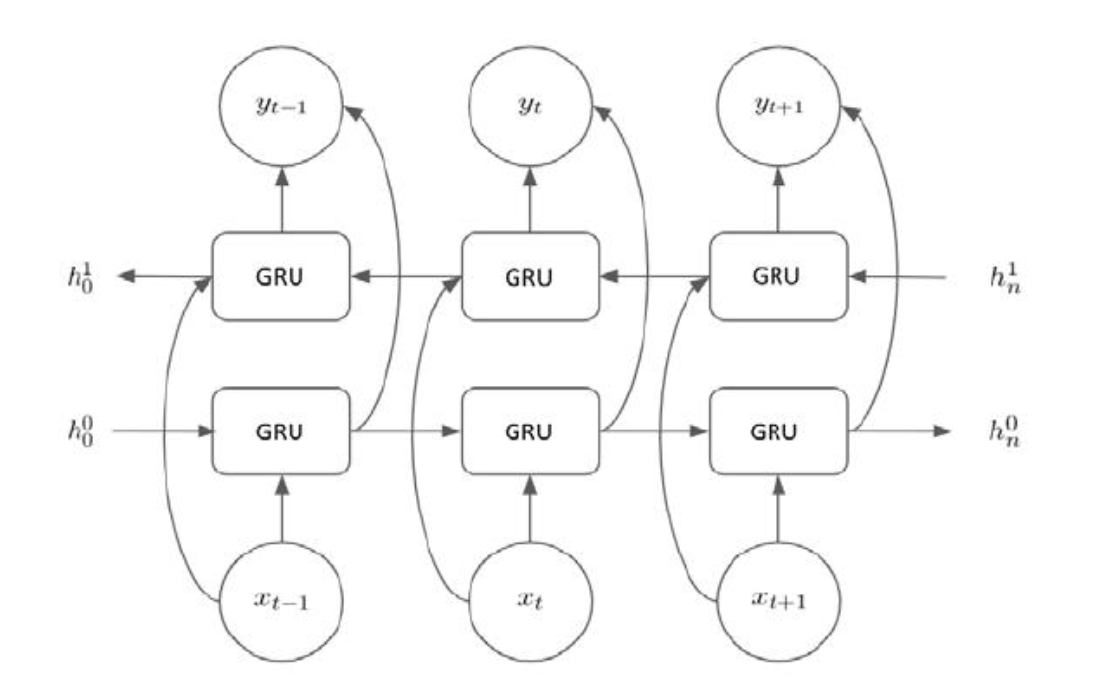

Nous maintenons deux états cachés, ainsi que des sorties à chaque étape, dans notre phrase d'entrée. 

* 3. Ensuite, nous devons créer une passe avant pour notre encodeur. Nous faisons cela en incorporant d'abord nos phrases d'entrée, puis en utilisant la fonction pack_padded_sequence sur nos incorporations. Cette fonction "packs" notre séquence padded afin que toutes nos entrées soient de la même longueur. Nous passons ensuite les séquences compressées à travers notre GRU pour effectuer une passe avant.

* 4. Après cela, nous décompressons notre padding et additionnons les sorties GRU. Nous pouvons ensuite renvoyer cette sortie additionnée, ainsi que notre état caché final, pour terminer notre passe avant

In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, hidden_size, embedding, n_layers=1, dropout=0):
        super(EncoderRNN, self).__init__()
        self.n_layers = n_layers
        self.hidden_size = hidden_size
        self.embedding = embedding

        self.gru = nn.GRU(hidden_size, hidden_size, n_layers,
                          dropout=(0 if n_layers == 1 else dropout), bidirectional=True)

    def forward(self, input_seq, input_lengths, hidden=None):
        embedded = self.embedding(input_seq)
        packed = nn.utils.rnn.pack_padded_sequence(embedded, input_lengths)
        outputs, hidden = self.gru(packed, hidden)
        # Unpack padding
        outputs, _ = nn.utils.rnn.pad_packed_sequence(outputs)
        # Sum bidirectional GRU outputs
        outputs = outputs[:, :, :self.hidden_size] + outputs[:, : ,self.hidden_size:]
        # Return output and final hidden state
        return outputs, hidden

## Construire le module d'attention 

Ensuite, nous devons construire notre module d'attention, que nous appliquerons à notre encodeur afin que nous puissions apprendre des parties pertinentes de la sortie de l'encodeur. Nous procéderons comme suit : 

* 1. Commencez par créer une classe pour le modèle d'attention

* 2. Ensuite, créez la fonction dot_score dans cette classe. Cette fonction calcule simplement le produit scalaire de la sortie de notre encodeur avec la sortie de notre état caché par notre encodeur. Bien qu'il existe d'autres façons de transformer ces deux tenseurs en une seule représentation, l'utilisation d'un produit scalaire est l'une des plus simples

* 3. Nous utilisons ensuite cette fonction dans notre passe avant. Tout d'abord, calculez les poids/énergies d'attention sur la base de la méthode dot_score, puis transposez les résultats et renvoyez les scores de probabilité transformés softmax




In [ ]:
class Attn(nn.Module):
    def __init__(self, hidden_size):
        super(Attn, self).__init__()
        self.hidden_size = hidden_size

    def dot_score(self, hidden, encoder_output):
        return torch.sum(hidden * encoder_output, dim=2)

    def forward(self, hidden, encoder_outputs):
        attn_energies = self.dot_score(hidden, encoder_outputs)
        attn_energies = attn_energies.t()
        return F.softmax(attn_energies, dim=1).unsqueeze(1)

Ensuite, nous pouvons utiliser ce module d'attention dans notre décodeur pour créer un décodeur focalisé sur l'attention.



##Construire le décodeur

Nous allons maintenant construire le décodeur, comme suit :

* 1. Nous commençons par créer notre classe DecoderRNN, en héritant de nn.Module et en définissant les paramètres d'initialisation

* 2. Nous créons ensuite nos couches au sein de ce module. Nous allons créer un une chouche d'intégration et de dropout correspondant. Nous utilisons à nouveau des GRU pour notre décodeur ; Cependant, cette fois, nous n'avons pas besoin de rendre notre couche GRU bidirectionnelle car nous décoderons la sortie de notre encodeur de manière séquentielle. Nous allons également créer deux couches linéaires : une couche régulière pour calculer notre sortie et une couche qui peut être utilisée pour la concaténation. Cet couche est deux fois plus large que le chouche caché normal car il sera utilisé sur deux vecteurs concaténés, chacun avec une longueur de hidden_size. Nous initialisons également une instance de notre module attention de la dernière section afin de pouvoir l'utiliser au sein de notre classe Decoder

* 3.Après avoir défini toutes nos couches, nous devons créer une passe avant pour le décodeur. Remarquez comment la passe avant sera utilisée pas à pas (mot) à la fois. Nous commençons par obtenir l'intégration du mot d'entrée actuel et par une passe avant à travers la couche GRU pour obtenir notre sortie et nos états cachés

* 4. Ensuite, nous utilisons le module attention pour obtenir les poids d'attention de la sortie GRU. Ces poids sont ensuite multipliés par les sorties de l'encodeur pour nous donner eectivement une somme pondérée de nos poids d'attention et de notre sortie d'encodeur

* 5. Nous concaténons ensuite notre vecteur de contexte pondéré avec la sortie de notre GRU et appliquons une fonction tanh pour obtenir la sortie concaténée finale

* 6. Pour l'étape finale dans notre décodeur, nous utilisons simplement cette sortie concaténée finale pour prédire le mot suivant et appliquer une fonction softmax. La passe avant renvoie ﬁnalement cette sortie, ainsi que l'état caché final. Cette passe avant sera itérée, la prochaine passe avant utilisant le mot suivant dans la phrase et ce nouvel état caché

In [ ]:
class DecoderRNN(nn.Module):
    def __init__(self, embedding, hidden_size, output_size, n_layers=1, dropout=0.1):
        super(DecoderRNN, self).__init__()

        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.dropout = dropout

        self.embedding = embedding
        self.embedding_dropout = nn.Dropout(dropout)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers, dropout=(0 if n_layers == 1 else dropout))
        self.concat = nn.Linear(2 * hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)

        self.attn = Attn(hidden_size)

    def forward(self, input_step, last_hidden, encoder_outputs):
        embedded = self.embedding(input_step)
        embedded = self.embedding_dropout(embedded)
        rnn_output, hidden = self.gru(embedded, last_hidden)
        attn_weights = self.attn(rnn_output, encoder_outputs)
        context = attn_weights.bmm(encoder_outputs.transpose(0, 1))
        rnn_output = rnn_output.squeeze(0)
        context = context.squeeze(1)
        concat_input = torch.cat((rnn_output, context), 1)
        concat_output = torch.tanh(self.concat(concat_input))
        output = self.out(concat_output)
        output = F.softmax(output, dim=1)
        return output, hidden

## Définir le processus d'apprentissage 

La première étape du processus d'apprentissage consiste à définir la mesure de la perte pour nos modèles. Comme nos tenseurs d'entrée peuvent être constitués de séquences padded, du fait que nos phrases d'entrée sont toutes de longueurs différentes, nous ne pouvons pas simplement calculer la différence entre la sortie réelle et les tenseurs de sortie prédits. Pour tenir compte de cela, nous allons définir une fonction de perte qui applique un masque booléen sur nos sorties et ne calcule que la perte des jetons non remplis : 

* 1. Dans la fonction suivante, nous pouvons voir que nous calculons la perte d'entropie croisée sur l'ensemble des tenseurs de sortie. Cependant, pour obtenir la perte totale, nous ne faisons la moyenne que sur les éléments du tenseur qui sont sélectionnés par le masque booléen

In [ ]:
def NLLMaskLoss(inp, target, mask):
    TotalN = mask.sum()
    CELoss = -torch.log(torch.gather(inp, 1, target.view(-1, 1)).squeeze(1))
    loss = CELoss.masked_select(mask).mean()
    loss = loss.to(device)
    return loss, TotalN.item()

* 2. Pour la majorité de notre formation, nous avons besoin de deux fonctions principales : une fonction, train(), qui effectue l'entrainement sur un seul lot de nos données d'entrainement et une autre fonction, trainIters(), qui parcourt l'ensemble de notre ensemble de données et appelle train() sur chacun des lots individuels. Nous commençons par définir train() afin de nous entraîner sur un seul lot de données. Créez la fonction train(), puis mettez les gradients à 0, dénissez les options de l'appareil et initialisez les variables

    * Ensuite, effectuez une passe avant des entrées et des longueurs de séquence à travers l'encodeur pour obtenir la sortie et les états 
    * Ensuite, nous créons notre entrée de décodeur initiale, en commençant par les jetons SOS pour chaque phrase. Nous définissons ensuite l'état caché initial de notre décodeur pour être égal à celui de l'encodeur

    Ensuite, nous implémentons le forçage des enseignants. Si vous vous souvenez du dernier guide, le forçage de l'enseignant, lors de la génération de séquences de sortie avec une probabilité donnée, nous utilisons le véritable jeton de sortie précédent plutôt que le jeton de sortie précédent prédit pour générer le mot suivant dans notre séquence de sortie. L'utilisation du forçage par l'enseignant permet à notre modèle de converger beaucoup plus rapidement ; Cependant, nous devons faire attention à ne pas rendre le ratio de forçage de l'enseignant trop élevé, sinon notre modèle dépendra trop du forçage de l'enseignant et n'apprendra pas à générer le résultat correct indépendamment

    * Déterminer si nous devons utiliser le forçage de l'enseignant pour l'étape en cours

    * Ensuite, si nous devons implémenter le forçage des enseignants. Nous passons chacun de nos lots de séquences dans le décodeur pour obtenir notre sortie. Nous définissons ensuite l'entrée suivante comme la vraie sortie (cible). Enfin, nous calculons et accumulons la perte à l'aide de notre fonction de perte et l'imprimons sur la console

    * Si nous n'implémentons pas le forçage enseignant sur un lot donné, la procédure est quasiment identique. Cependant, au lieu d'utiliser la vraie sortie comme entrée suivante dans la séquence, nous utilisons celle générée par le modèle

    * Enfin, comme pour tous nos modèles, les étapes finales consistent à effectuer une rétropropagation, à implémenter l'écrêtage de gradient et à parcourir nos optimiseurs d'encodeur et de décodeur pour mettre à jour les poids à l'aide de la descente de gradient. N'oubliez pas que nous éliminons les gradients afin d'éviter le problème de gradient de disparition/explosion, qui a été discuté dans les chapitres précédents. Enfin, notre étape d'entraînement renvoie notre perte moyenne

In [ ]:
def train(input_variable, lengths, target_variable, mask, max_target_len, encoder, decoder, embedding,
          encoder_optimizer, decoder_optimizer, batch_size, clip, max_length=max_length):

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_variable = input_variable.to(device)
    lengths = lengths.to(device)
    target_variable = target_variable.to(device)
    mask = mask.to(device)

    loss = 0
    print_losses = []
    n_totals = 0

    encoder_outputs, encoder_hidden = encoder(input_variable, lengths)

    decoder_input = torch.LongTensor([[SOS_token for _ in range(batch_size)]])
    decoder_input = decoder_input.to(device)

    decoder_hidden = encoder_hidden[:decoder.n_layers]

    use_TF = True if random.random() < teacher_forcing_ratio else False

    if use_TF:
        for t in range(max_target_len):
            decoder_output, decoder_hidden = decoder(
                decoder_input, decoder_hidden, encoder_outputs
            )
            decoder_input = target_variable[t].view(1, -1)
            mask_loss, nTotal = NLLMaskLoss(decoder_output, target_variable[t], mask[t])
            loss += mask_loss
            print_losses.append(mask_loss.item() * nTotal)
            n_totals += nTotal
    else:
        for t in range(max_target_len):
            decoder_output, decoder_hidden = decoder(
                decoder_input, decoder_hidden, encoder_outputs
            )
            _, topi = decoder_output.topk(1)
            decoder_input = torch.LongTensor([[topi[i][0] for i in range(batch_size)]])
            decoder_input = decoder_input.to(device)
            mask_loss, nTotal = NLLMaskLoss(decoder_output, target_variable[t], mask[t])
            loss += mask_loss
            print_losses.append(mask_loss.item() * nTotal)
            n_totals += nTotal

    loss.backward()

    _ = nn.utils.clip_grad_norm_(encoder.parameters(), clip)
    _ = nn.utils.clip_grad_norm_(decoder.parameters(), clip)

    encoder_optimizer.step()
    decoder_optimizer.step()

    return sum(print_losses) / n_totals

* 3. Ensuite, comme indiqué précédemment, nous devons créer la fonction trainIters(), qui appelle à plusieurs reprises notre fonction de formation sur différents lots de données d'entrée. Nous commençons par diviser nos données en lots à l'aide de la fonction batch2Train que nous avons créée précédemment.

    * Nous créons ensuite quelques variables qui nous permettront de compter les itérations et de garder une trace de la perte totale sur chaque époque
    * Ensuite, nous définissons notre boucle d'entraînement. Pour chaque itération, nous obtenons un lot d'apprentissage à partir de notre liste de lots. Nous extrayons ensuite les champs pertinents de notre lot et exécutons une seule itération d'apprentissage à l'aide de ces paramètres. Enfin, nous ajoutons la perte de ce lot à notre perte globale.
    * À chaque itération, nous nous assurons également d'imprimer nos progrès jusqu'à présent, en gardant une trace du nombre d'itérations que nous avons terminées et de notre perte pour chaque époque.
    * Par souci d'achèvement, nous devons également sauvegarder l'état de notre modèle toutes les quelques époques. Cela nous permet de revisiter tous les modèles historiques que nous avons formés ; par exemple, si notre modèle commençait à surcharger, nous pourrions revenir à une itération précédente

In [ ]:
def trainIters(model_name, voc, pairs, encoder, decoder, encoder_optimizer,\
               decoder_optimizer, embedding, encoder_n_layers, decoder_n_layers, \
               save_dir, n_iteration, batch_size, print_every, save_every, clip, corpus_name, loadFilename):

    training_batches = [batch2Train(voc, [random.choice(pairs) for _ in range(batch_size)])
                      for _ in range(n_iteration)]

    print('Starting ...')
    start_iteration = 1
    print_loss = 0
    if loadFilename:
        start_iteration = checkpoint['iteration'] + 1

    print("Beginning Training...")
    for iteration in range(start_iteration, n_iteration + 1):
        training_batch = training_batches[iteration - 1]
        # Extract fields from batch
        input_variable, lengths, target_variable, mask, max_target_len = training_batch

        # Run a training iteration with batch
        loss = train(input_variable, lengths, target_variable, mask, max_target_len, encoder,
                     decoder, embedding, encoder_optimizer, decoder_optimizer, batch_size, clip)
        print_loss += loss

        if iteration % print_every == 0:
            print_loss_avg = print_loss / print_every
            print("Iteration: {}; Percent done: {:.1f}%; Mean loss: {:.4f}".format(iteration, iteration / n_iteration * 100, print_loss_avg))
            print_loss = 0

        if (iteration % save_every == 0):
            directory = os.path.join(save_dir, model_name, corpus_name, '{}-{}_{}'.format(encoder_n_layers, decoder_n_layers, hidden_size))
            if not os.path.exists(directory):
                os.makedirs(directory)
            torch.save({
                'iteration': iteration,
                'en': encoder.state_dict(),
                'de': decoder.state_dict(),
                'en_opt': encoder_optimizer.state_dict(),
                'de_opt': decoder_optimizer.state_dict(),
                'loss': loss,
                'voc_dict': voc.__dict__,
                'embedding': embedding.state_dict()
            }, os.path.join(directory, '{}_{}.tar'.format(iteration, 'checkpoint')))

Maintenant que nous avons terminé toutes les étapes nécessaires pour commencer à entraîner notre modèle, nous devons créer des fonctions pour nous permettre d'évaluer les performances du modèle.

## Définir le processus d'évaluation 

L'évaluation d'un chatbot est légèrement différente de l'évaluation d'autres modèles séquence à séquence. Dans notre tâche de traduction de texte, une phrase en anglais aura une traduction directe en francais. Bien qu'il puisse y avoir plusieurs traductions correctes, pour la plupart, il n'y a qu'une seule traduction correcte d'une langue à une autre. Pour les chatbots, il existe plusieurs sorties valides différentes. 

Prenez les trois lignes suivantes de certaines conversations avec un chatbot


Input: "Hello"

Output: "Hello"

Input: "Hello"

Output: "Hello. How are you?

"Input: "Hello"

Output: "What do you want?"


Ici, nous avons trois réponses différentes, chacune également valable en tant que réponse. Par conséquent, à chaque étape de notre conversation avec notre chatbot, il n'y aura pas une seule réponse « correcte ». L'évaluation est donc beaucoup plus dificile. La façon la plus intuitive de tester si un chatbot produit une sortie valide est d'avoir une conversation avec lui ! Cela signifie que nous devons configurer notre chatbot de manière à nous permettre d'avoir une conversation avec lui pour déterminer s'il fonctionne bien :

* 1. Nous commencerons par définir une classe qui nous permettra de décoder l'entrée encodée et de produire du texte. Pour ce faire, nous utilisons ce qu'on appelle un greedy encoder. Cela signifie simplement qu'à chaque étape du décodeur, notre modèle prend le mot avec la probabilité prédite la plus élevée comme sortie. Nous commençons par initialiser la classe GreedyEncoder() avec notre encodeur et décodeur pré-entraînés

* 2 . Ensuite, dénissez une passe avant pour notre décodeur. Nous passons l'entrée à travers notre encodeur pour obtenir la sortie et l'état caché de notre encodeur. Nous considérons que la couche cachée finale de l'encodeur est la première entrée cachée du décodeur.

* 3. Ensuite, créez l'entrée du décodeur avec des jetons SOS et initialisez les tenseurs auxquels ajouter les mots décodés (initialisés comme une seule valeur zéro)

* 4. Après cela, parcourez la séquence en décodant un mot à la fois. Nous effectuons un passage en avant dans l'encodeur et ajoutons une fonction max pour obtenir le mot prédit ayant le score le plus élevé et son score, que nous ajoutons ensuite aux variables all_tokens et all_scores. Enfin, nous prenons ce jeton prédit et l'utilisons comme la prochaine entrée de notre décodeur. Après que toute la séquence a été itérée, nous retournons la phrase prédite complète

In [ ]:
class GreedySearchDecoder(nn.Module):
    def __init__(self, encoder, decoder):
        super(GreedySearchDecoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, input_seq, input_length, max_length):
        encoder_outputs, encoder_hidden = self.encoder(input_seq, input_length)
        decoder_hidden = encoder_hidden[:decoder.n_layers]
        decoder_input = torch.ones(1, 1, device=device, dtype=torch.long) * SOS_token
        all_tokens = torch.zeros([0], device=device, dtype=torch.long)
        all_scores = torch.zeros([0], device=device)
        for _ in range(max_length):
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden, encoder_outputs)
            decoder_scores, decoder_input = torch.max(decoder_output, dim=1)
            all_tokens = torch.cat((all_tokens, decoder_input), dim=0)
            all_scores = torch.cat((all_scores, decoder_scores), dim=0)
            decoder_input = torch.unsqueeze(decoder_input, 0)
        return all_tokens, all_scores

Toutes les pièces commencent à s'assembler. Nous avons les fonctions d'entraînement et d'évaluation définies, donc la dernière étape consiste à écrire une fonction qui prendra réellement notre entrée sous forme de texte, la transmettra à notre modèle et obtiendra une réponse du modèle. Ce sera "l'interface" de notre chatbot, où nous avons réellement notre conversation

* 5. Nous définissons d'abord une fonction d'évaluation(), qui prend notre fonction d'entrée et renvoie les mots de sortie prédits. Nous commençons par transformer notre phrase d'entrée en indices en utilisant notre vocabulaire. On obtient alors un tenseur des longueurs de chacune de ces phrases et on le transpose

* 6. Ensuite, nous attribuons nos longueurs et nos tenseurs d'entrée concernés. Ensuite, exécutez les entrées via le moteur de recherche (GreedySearchDecoder) pour obtenir les indices de mots de la sortie prédite. Enfin, nous retransformons ces indices de mots en jetons de mots avant de les renvoyer en tant que sortie de fonction

In [ ]:
def evaluate(encoder, decoder, searcher, voc, sentence, max_length=max_length):
    indices = [indexFromSentence(voc, sentence)]
    lengths = torch.tensor([len(indexes) for indexes in indices])
    input_batch = torch.LongTensor(indices).transpose(0, 1)
    input_batch = input_batch.to(device)
    lengths = lengths.to(device)
    tokens, scores = searcher(input_batch, lengths, max_length)
    decoded_words = [voc.index2word[token.item()] for token in tokens]
    return decoded_words

* 7. Enfin, nous créons une fonction runchatbot, qui fait office d'interface avec notre chatbot. Cette fonction prend une entrée de type humain et imprime la réponse du chatbot. Nous créons cette fonction comme une boucle while qui continue jusqu'à ce que nous terminions la fonction ou tapions quit comme entrée.

* 8. Nous prenons ensuite l'entrée tapée et la normalisons, avant de passer l'entrée normalisée à notre fonction évaluer(), qui renvoie les mots prédits du chatbot

* 9. Enfin, nous prenons ces mots de sortie et les formatons, en ignorant les jetons EOS et de pad, avant d'imprimer la réponse du chatbot. Parce qu'il s'agit d'une boucle while, cela nous permet de continuer la conversation avec le chatbot indéfiniment 

In [ ]:
def cleanString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    s = re.sub(r"\s+", r" ", s).strip()
    return s

In [ ]:
def runChatBot(encoder, decoder, searcher, voc):
    input_sentence = ''
    while(1):
        try:
            input_sentence = input('> ')
            if input_sentence == 'quit': break
            input_sentence = cleanString(input_sentence)
            output_words = evaluate(encoder, decoder, searcher, voc, input_sentence)
            output_words[:] = [x for x in output_words if not (x == 'EOS' or x == 'PAD')]
            print('Response:', ' '.join(output_words))

        except KeyError:
            print("Error: Unknown Word")

Maintenant que nous avons construit toutes les fonctions nécessaires pour entraîner, évaluer et utiliser notre chatbot, il est temps de commencer la dernière étape : entraîner notre modèle et converser avec notre chatbot formé.

## Entraîner le modèle

Comme nous avons défini toutes les fonctions nécessaires, l'entraînement du modèle devient juste un cas ou l'initialisation de nos hyperparamètres et l'appel de nos fonctions d'entraînement:

1. Nous initialisons d'abord nos hyperparamètres. Bien qu'il ne s'agisse que d'hyperparamètres suggérés, nos modèles ont été configurés de manière à leur permettre de s'adapter aux hyperparamètres qui leur sont transmis. Il est recommandé d'expérimenter avec différents hyperparamètres pour voir lesquels conduisent à une configuration de modèle optimale. Ici, vous pouvez expérimenter en augmentant le nombre de couches dans votre encodeur et décodeur, en augmentant ou en diminuant la taille des couches cachées ou en augmentant la taille du lot. Tous ces hyperparamètres auront un effet sur la façon dont votre modèle apprend, ainsi que sur un certain nombre d'autres facteurs, tels que le temps qu'il faut pour entraîner le modèle.


2. Après cela, nous pouvons charger nos points de contrôle. Si nous avons déjà formé un modèle, nous pouvons charger les points de contrôle et les états du modèle des itérations précédentes. Cela nous évite d'avoir à recycler notre modèle à chaque fois

3. Après cela, nous pouvons commencer à construire nos modèles. Nous chargeons d'abord nos plongements à partir du vocabulaire. Si nous avons déjà entraîné un modèle, nous pouvons charger la couche d'intégration entraînée

4. Nous faisons ensuite de même pour notre encodeur et notre décodeur, en créant des instances de modèle à l'aide des hyperparamètres définis. Encore une fois, si nous avons déjà formé un modèle, nous chargeons simplement les états du modèle formé dans nos modèles

In [ ]:

model_name = 'chatbot_model'
hidden_size = 500
encoder_n_layers = 2
decoder_n_layers = 2
dropout = 0.15
batch_size = 64

loadFilename = None
checkpoint_iter = 4000

if loadFilename:
    checkpoint = torch.load(loadFilename)
    encoder_sd = checkpoint['en']
    decoder_sd = checkpoint['de']
    encoder_optimizer_sd = checkpoint['en_opt']
    decoder_optimizer_sd = checkpoint['de_opt']
    embedding_sd = checkpoint['embedding']
    voc.__dict__ = checkpoint['voc_dict']


print('Building encoder and decoder ...')

embedding = nn.Embedding(voc.num_words, hidden_size)

if loadFilename:
    embedding.load_state_dict(embedding_sd)

encoder = EncoderRNN(hidden_size, embedding, encoder_n_layers, dropout)
decoder = DecoderRNN(embedding, hidden_size, voc.num_words, decoder_n_layers, dropout)

if loadFilename:
    encoder.load_state_dict(encoder_sd)
    decoder.load_state_dict(decoder_sd)

encoder = encoder.to(device)
decoder = decoder.to(device)
print('Models built and ready to go!')

Building encoder and decoder ...
Models built and ready to go!


Nous commençons par initialiser quelques hyperparamètres d'entraînement. De la même manière que les hyperparamètres de notre modèle, ceux-ci peuvent être ajustés pour influencer le temps d'entraînement et la façon dont notre modèle apprend. Clip contrôle le découpage du dégradé et le forçage de l'enseignant contrôle la fréquence à laquelle nous utilisons le forçage de l'enseignant dans notre modèle. Remarquez comment nous utilisons un ratio de forçage par enseignant de 1 afin que nous utilisions toujours le forçage par enseignant. Abaisser le ratio de forçage d'enseignement signifierait que notre modèle mettrait beaucoup plus de temps à converger ; Cependant, cela pourrait aider notre modèle à générer des phrases correctes par lui-même mieux à long terme

6. Nous devons également définir les taux d'apprentissage de nos modèles et le taux d'apprentissage de notre décodeur. Vous constaterez que votre modèle fonctionne mieux lorsque le décodeur effectue des mises à jour de paramètres plus importantes pendant la descente de gradient. Par conséquent, nous introduisons un taux d'apprentissage du décodeur pour appliquer un multiplicateur au taux d'apprentissage de sorte que le taux d'apprentissage soit plus élevé pour le décodeur que pour le codeur. Nous définissons également à quelle fréquence notre modèle imprime et enregistre les résultats, ainsi que le nombre d'époques pendant lesquelles nous voulons que notre modèle s'exécute.

7. Ensuite, comme toujours lors de l'entraînement des modèles dans PyTorch, nous passons nos modèles en mode d'entraînement pour permettre la mise à jour des paramètres

8. Ensuite, nous créons des optimiseurs pour l'encodeur et le décodeur. Nous les initialisons en tant qu'optimiseurs Adam, mais d'autres optimiseurs fonctionneront tout aussi bien. Expérimenter avec différents optimiseurs peut produire différents niveaux de performance du modèle. Si vous avez déjà entraîné un modèle, vous pouvez également charger les états de l'optimiseur si nécessaire

9. La dernière étape avant d'exécuter la formation est de s'assurer que CUDA est configuré pour être appelé si vous souhaitez utiliser la formation GPU. Pour ce faire, nous parcourons simplement les états de l'optimiseur pour l'encodeur et le décodeur et activons CUDA dans tous les états

10. Enfin, nous sommes prêts à entraîner notre modèle. Cela peut être fait en appelant simplement la fonction trainIters avec tous les paramètres requis

In [ ]:
save_dir = './'

clip = 50.0
teacher_forcing_ratio = 1.0
learning_rate = 0.0001
decoder_learning_ratio = 5.0

epochs = 4000

print_every = 1
save_every = 500

encoder.train()
decoder.train()

print('Building optimizers ...')
encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=learning_rate * decoder_learning_ratio)

if loadFilename:
    encoder_optimizer.load_state_dict(encoder_optimizer_sd)
    decoder_optimizer.load_state_dict(decoder_optimizer_sd)

for state in encoder_optimizer.state.values():
    for k, v in state.items():
        if isinstance(v, torch.Tensor):
            state[k] = v.cuda()

for state in decoder_optimizer.state.values():
    for k, v in state.items():
        if isinstance(v, torch.Tensor):
            state[k] = v.cuda()

print("Starting Training!")
trainIters(model_name, voc, pairs, encoder, decoder, encoder_optimizer, decoder_optimizer,
           embedding, encoder_n_layers, decoder_n_layers, save_dir, epochs, batch_size,
           print_every, save_every, clip, corpus_name, loadFilename)

Building optimizers ...
Starting Training!
Starting ...
Beginning Training...
Iteration: 1; Percent done: 0.0%; Mean loss: 8.9580
Iteration: 2; Percent done: 0.1%; Mean loss: 8.8357
Iteration: 3; Percent done: 0.1%; Mean loss: 8.6399
Iteration: 4; Percent done: 0.1%; Mean loss: 8.3210
Iteration: 5; Percent done: 0.1%; Mean loss: 7.9429
Iteration: 6; Percent done: 0.1%; Mean loss: 7.4589
Iteration: 7; Percent done: 0.2%; Mean loss: 7.0481
Iteration: 8; Percent done: 0.2%; Mean loss: 6.7506
Iteration: 9; Percent done: 0.2%; Mean loss: 6.5197
Iteration: 10; Percent done: 0.2%; Mean loss: 6.3990
Iteration: 11; Percent done: 0.3%; Mean loss: 6.0886
Iteration: 12; Percent done: 0.3%; Mean loss: 5.6848
Iteration: 13; Percent done: 0.3%; Mean loss: 5.4399
Iteration: 14; Percent done: 0.4%; Mean loss: 5.5671
Iteration: 15; Percent done: 0.4%; Mean loss: 5.3365
Iteration: 16; Percent done: 0.4%; Mean loss: 5.4151
Iteration: 17; Percent done: 0.4%; Mean loss: 5.3969
Iteration: 18; Percent done: 0

## Évaluation le modèle

Maintenant que nous avons créé et entraîné avec succès notre modèle, il est temps d'évaluer ses performances. Nous le ferons en suivant les étapes suivantes : 

* 1. Pour commencer l'évaluation, nous passons d'abord notre modèle en mode évaluation. Comme pour tous les autres modèles PyTorch, cela est fait pour empêcher toute autre mise à jour des paramètres au cours du processus d'évaluation

In [ ]:
encoder.eval()
decoder.eval()

DecoderRNN(
  (embedding): Embedding(7826, 500)
  (embedding_dropout): Dropout(p=0.15, inplace=False)
  (gru): GRU(500, 500, num_layers=2, dropout=0.15)
  (concat): Linear(in_features=1000, out_features=500, bias=True)
  (out): Linear(in_features=500, out_features=7826, bias=True)
  (attn): Attn()
)

* 2. Nous initialisons également une instance de GreedySearchDecoder afin de pouvoir effectuer l'évaluation et renvoyer la sortie prédite sous forme de texte

In [ ]:
searcher = GreedySearchDecoder(encoder, decoder)

* 3. Enfin, pour exécuter le chatbot, nous appelons simplement la fonction runchatbot, en lui passant encodeur, décodeur, chercheur et voc


Cela ouvrira une invite de saisie pour vous permettre de saisir votre texte

Saisissez votre texte ici et appuyez sur Entrée pour envoyer votre saisie au chatbot. En utilisant notre modèle entraîné, notre chatbot créera une réponse et l'imprimera sur la console


Vous pouvez répéter ce processus autant de fois que vous le souhaitez pour avoir une "conversation" avec le chatbot. À un niveau conversationnel simple, le chatbot peut produire des résultats étonnamment bons


Cependant, une fois que la conversation devient plus complexe, il deviendra évident que le chatbot n'est pas capable du même niveau de conversation qu'un humain

In [ ]:
runChatBot(encoder, decoder, searcher, voc)

Response: hello . bucks . bucks .
Response: gretchen . shaw . singer .
Response: he s in the bathroom . .
Response: i ll be there . bucks .
Response: what s that ? elevator ? ?


Il est clair que nous avons créé un chatbot capable de simples conversations. Cependant, nous avons encore un long chemin à parcourir avant que notre chatbot puisse passer le test de Turing et être capable de nous convaincre que nous parlons réellement à un être humain. Cependant, compte tenu du corpus de données relativement petit sur lequel nous avons entraîné notre modèle, l'utilisation de l'attention dans notre modèle séquence à séquence a donné des résultats raisonnablement bons, démontrant à quel point ces architectures peuvent être polyvalentes. Alors que les meilleurs chatbots sont entraînés sur vastes corpus de milliards de points de données, notre modèle s'est avéré raisonnablement ecace avec un relativement petit. Cependant, les réseaux d'attention de base ne sont plus à la pointe de la technologie et dans notre prochain chapitre, nous discuterons de certains des développements les plus récents pour l'apprentissage de la PNL qui ont abouti à des chatbots encore plus réalistes.